<a href="https://colab.research.google.com/github/JAlonMor/Herramientas/blob/main/StreamlitPenguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [ ]:
# Clonar repositorio de GitHub si no está disponible

import os
curr_dir = os.getcwd()

if not os.path.exists(os.path.join(curr_dir, '../.ROOT_DIR')):
  !git clone https://github.com/JAlonMor/Herramientas.git
  os.chdir(os.path.join(curr_dir, 'Herramientas/'))

Cloning into 'Herramientas'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
# Importar librerías necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creo DataFrame a partir de los datos obtenidos mediante web scraping

df = pd.read_csv("/content/Herramientas/penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Verifico si existen valores nulos

df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df[df.culmen_length_mm.isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.sex.isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Comprobados los valos nulos del dataset, borro los índices 3 y 339 completamente.
El resto de resultados con NaN en el atributo sex, los sustituyo por la palabra "NoInfo"

In [ ]:
df.iloc[[3,339],:]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(index = [3,339], inplace=True)

In [ ]:
df.iloc[[3,339],:]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


In [ ]:
df['sex'] = df.sex.fillna('NoInfo')

In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Continuúo con el análisis de de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


Creo variables categóricas para característica "sex"

In [ ]:
df['sex_'] = df['sex']
df = pd.get_dummies(df, prefix = 'sex', columns = ['sex'], drop_first = True)
df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_,sex_FEMALE,sex_MALE,sex_NoInfo
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE,1,0,0
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE,0,1,0
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE,1,0,0
119,Adelie,Torgersen,41.1,18.6,189.0,3325.0,MALE,0,1,0
85,Adelie,Dream,41.3,20.3,194.0,3550.0,MALE,0,1,0


In [ ]:
# Compruebo cantidad de difrentes valores para "island"

df.value_counts('island')

island
Biscoe       167
Dream        124
Torgersen     51
dtype: int64

In [ ]:
# Transformo en categórico

df['island_'] = df['island']
df = pd.get_dummies(df, prefix = 'island', columns = ['island'], drop_first = True)
df.sample(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_,sex_FEMALE,sex_MALE,sex_NoInfo,island_,island_Dream,island_Torgersen
343,Gentoo,49.9,16.1,213.0,5400.0,MALE,0,1,0,Biscoe,0,0
116,Adelie,38.6,17.0,188.0,2900.0,FEMALE,1,0,0,Torgersen,0,1
212,Chinstrap,51.9,19.5,206.0,3950.0,MALE,0,1,0,Dream,1,0
276,Gentoo,43.8,13.9,208.0,4300.0,FEMALE,1,0,0,Biscoe,0,0
168,Chinstrap,50.3,20.0,197.0,3300.0,MALE,0,1,0,Dream,1,0


In [ ]:
# Ver tipos de especies

df.value_counts('species')

species
Adelie       151
Gentoo       123
Chinstrap     68
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
sex_FEMALE,342.0,0.482456,0.500424,0.0,0.000,0.00,1.0,1.0
sex_MALE,342.0,0.491228,0.500656,0.0,0.000,0.00,1.0,1.0
sex_NoInfo,342.0,0.023392,0.151366,0.0,0.000,0.00,0.0,1.0
island_Dream,342.0,0.362573,0.481447,0.0,0.000,0.00,1.0,1.0
island_Torgersen,342.0,0.149123,0.356731,0.0,0.000,0.00,0.0,1.0


In [ ]:
# Creo diferente dataframes con los tipos de especies

df_Adelie = df[df['species'] == 'Adelie']
df_Gentoo = df[df['species'] == 'Gentoo']
df_Chinstrap = df[df['species'] == 'Chinstrap']

feature_names = ['culmen_length_mm',	'culmen_depth_mm',	'flipper_length_mm',	'body_mass_g']


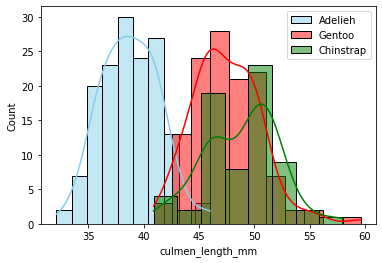

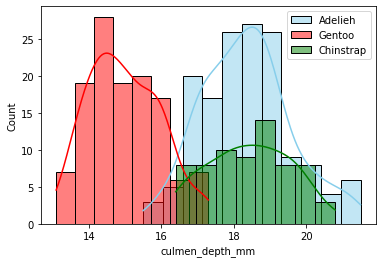

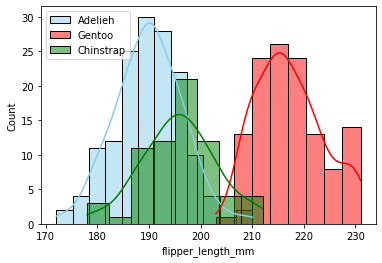

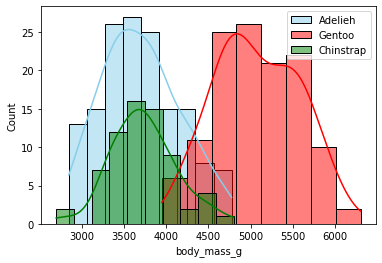

In [ ]:
# Analizamos si las clase pueden ser fácilmente separables

for feature in feature_names:

  sns.histplot(data=df_Adelie, x=feature, color="skyblue", label="Adelieh", kde=True)
  sns.histplot(data=df_Gentoo, x=feature, color="red", label="Gentoo", kde=True)
  sns.histplot(data=df_Chinstrap, x=feature, color="green", label="Chinstrap", kde=True)


  plt.legend() 
  plt.show()

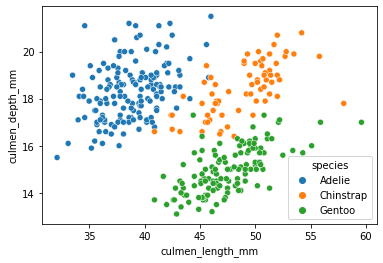

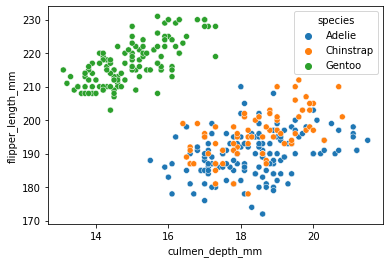

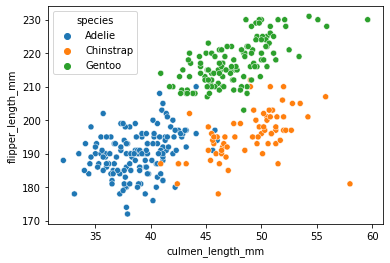

In [ ]:
# Analizo con gráfico de puntos

plt.figure()
sns.scatterplot( data = df, x = 'culmen_length_mm', y = 'culmen_depth_mm', hue = 'species', c='m', )
plt.show()
sns.scatterplot( data = df, x = 'culmen_depth_mm', y = 'flipper_length_mm', hue = 'species', c='m', )
plt.show()
sns.scatterplot( data = df, x = 'culmen_length_mm', y = 'flipper_length_mm', hue = 'species', c='m', )
plt.show();

In [ ]:
# Exporto dataframe a CSV

df.to_csv('df_penguin.csv', index = False)


## STREAMLIT

In [ ]:
!pip install --upgrade streamlit

In [ ]:
%%writefile /content/Herramientas/streamlit_app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

st.set_page_config(layout = "wide")

@st.cache
def load_data():
  df = pd.read_csv('/content/Herramientas/df_penguin.csv')
  return df

df = load_data()

st.title('Análisis de diferentes clase de pingüinos')
st.header("Características de los diferentes pingüinos")
st.write(df)
page = st.sidebar.selectbox('Seleccione que quiere visualizar',
  ['Histogramas especies vs métricas','Histograma especies-separación', 'Diagrama dispersión de puntos'])

if page == 'Histogramas especies vs métricas':
  # Especies
  clist = df['species'].unique()

  specie = st.selectbox("Seleccione una especie:",clist)
  col1, col2, col3 = st.columns(3)

  fig = px.histogram(df[df['species'] == specie], x="culmen_length_mm")
    
  col1.plotly_chart(fig,use_container_width = True)

  fig = px.histogram(df[df['species'] == specie], x="culmen_depth_mm")
    
  col2.plotly_chart(fig,use_container_width = True)

  fig = px.histogram(df[df['species'] == specie], x="flipper_length_mm")
    
  col3.plotly_chart(fig,use_container_width = True)

elif page == 'Histograma especies-separación':
  # Separación especies histogramas
   
  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

  sns.kdeplot(data=df, x='flipper_length_mm', hue='species', multiple='stack', ax=ax1)
  sns.kdeplot(data=df, x='culmen_length_mm', hue='species', multiple='stack', ax=ax2)
  sns.kdeplot(data=df, x='culmen_depth_mm', hue='species', multiple='stack', ax=ax3)
  sns.kdeplot(data=df, x='body_mass_g', hue='species', multiple='stack', ax=ax4)
  
  ax1.set_title('flipper_length_mm')
  ax2.set_title('culmen_length_mm')
  ax3.set_title('culmen_depth_mm')
  ax4.set_title('body_mass_g')

  fig.set_tight_layout(True)
  st.pyplot(fig)

elif page == 'Diagrama dispersión de puntos':
  # Diagramas de puntos
  fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,10))

  

  sns.scatterplot( data = df, x = 'culmen_length_mm', y = 'culmen_depth_mm', hue = 'species', c='m', ax = ax1)
  sns.scatterplot( data = df, x = 'culmen_depth_mm', y = 'flipper_length_mm', hue = 'species', c='m', ax = ax2)
  sns.scatterplot( data = df, x = 'culmen_length_mm', y = 'flipper_length_mm', hue = 'species', c='m', ax = ax3)
  
  ax1.set_title('culmen_length_mm Vs culmen_depth_mm')
  ax2.set_title('culmen_depth_mm Vs flipper_length_mm')
  ax3.set_title('culmen_length_mm Vs flipper_length_mm')
  

  fig.set_tight_layout(True)
  st.pyplot(fig)
  



Overwriting /content/Herramientas/streamlit_app.py


## PUBLICACIÓN

Iniciar aplicación y comprobar

In [ ]:
%%bash --bg 
streamlit run streamlit_app.py > debug.log 2>&1

In [ ]:
!tail debug.log

In [ ]:
!curl http://172.28.0.2:8501

<!doctype html><html lang="en"><head><meta charset="UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no"/><link rel="shortcut icon" href="./favicon.png"/><title>Streamlit</title><script src="./vendor/viz/viz-1.8.0.min.js" type="javascript/worker"></script><script src="./vendor/bokeh/bokeh-2.4.1.min.js"></script><script src="./vendor/bokeh/bokeh-widgets-2.4.1.min.js"></script><script src="./vendor/bokeh/bokeh-tables-2.4.1.min.js"></script><script src="./vendor/bokeh/bokeh-api-2.4.1.min.js"></script><script src="./vendor/bokeh/bokeh-gl-2.4.1.min.js"></script><script src="./vendor/bokeh/bokeh-mathjax-2.4.1.min.js"></script><link href="./static/css/5.71be5c0a.chunk.css" rel="stylesheet"><link href="./static/css/main.b46f6fce.chunk.css" rel="stylesheet"></head><body><noscript>You need to enable JavaScript to run this app.</noscript><div id="root"></div><script>!function(e){function t(t){for(var n,c,o=t[0],a=t[1],u=t[2],i=0,s=[];i<o.length;i++)c=o[i],Ob

Instalar Ngrok e iniciar servicio. Comprobar

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip && unzip ngrok-stable-linux-amd64.zip

--2022-05-22 16:56:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  52.6MB/s    in 0.3s    

2022-05-22 16:56:47 (52.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 297PlHWSQ56UEGg43jRkQZLoqv9_6j9MfBr17NvHEbZ2QDfnL #TODO

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%bash --bg

./ngrok http 172.28.0.2:8501 > ngrok.log 2>&1

In [ ]:
!tail ngrok.log

Obtener URL para acceso web de nuestra aplicación

In [ ]:
!apt-get install jq

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [ ]:
!curl -s http://localhost:4040/api/tunnels | jq ".tunnels[0].public_url"

"https://579a-35-229-35-172.ngrok.io"


🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉🠉

# URL aplicación web